## Develop a logistic regression model that predicts dropout

### Preparation of the working environment

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [5]:
# Load data
filename = 'Deserción estudiantil.xlsx'
df = pd.read_excel(filename)
df.head()

,Marca temporal,Género,¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora?,¿Cómo calificarías tu nivel socioeconómico?,¿Cómo calificarías tu nivel de salud psicológica?,¿Qué tan frecuente es tu participación en programas de apoyo estudiantil (tutorías o programas de orientación académica)?,¿Qué tan frecuente tiene compromisos externos a la universidad?,¿Recibes apoyo y comprensión de tu familia en relación con tus estudios universitarios?,"¿Se siente estresado por la sobrecarga académica (tareas, practicas, etc.) ?",¿Tienes dificultades para aprender lo que te enseñan en la universidad?,¿Crees que las calificaciones son justas?,¿En el ultimo semestre has jalado más de 2 cursos?,¿Crees que tu ingreso familiar es el adecuado para solventar los gastos?,¿Crees que vives lejos de la universidad?,¿Has desertado de la universidad?
0,2024-02-24 15:02:43.832,Masculino,4,3,4,2,3,4,Si,No,Si,No,Si,Si,No
1,2024-02-24 15:03:46.286,Masculino,4,3,4,2,3,5,Si,Si,Si,No,Si,No,No
2,2024-02-24 15:58:16.689,Masculino,4,2,3,3,3,4,Si,No,No,No,No,No,No
3,2024-02-24 16:02:46.593,Femenino,4,3,3,3,2,3,Si,Si,No,No,No,No,No
4,2024-02-24 16:06:01.006,Masculino,3,3,4,2,3,4,Si,No,No,No,Si,Si,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype         
---  ------                                                                                                                     --------------  -----         
 0   Marca temporal                                                                                                             55 non-null     datetime64[ns]
 1   Género                                                                                                                     55 non-null     object        
 2   ¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora?                                                     55 non-null     int64         
 3   ¿Cómo calificarías tu nivel socioeconómico?                                                      

## Some stadistics about the data

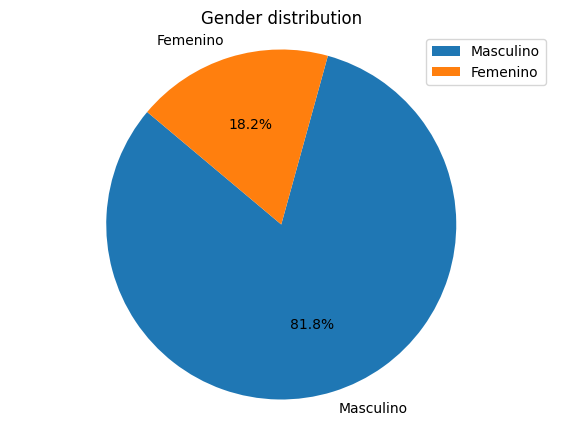

In [7]:
# Count ocurrency of each element
gender_count = df['Género'].value_counts()

# Create the graphic and its features
plt.figure(figsize=(7,5 ))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender distribution')
plt.axis('equal')
plt.legend(gender_count.index, loc='upper right')
plt.show()

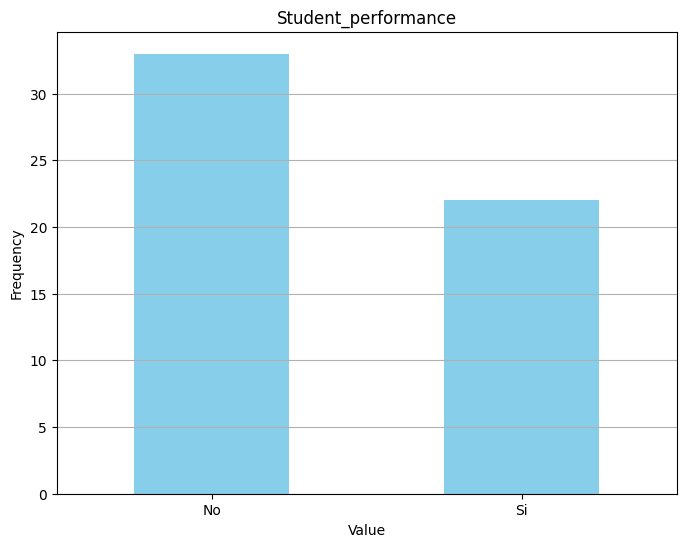

In [8]:
# Calculate the frequency of the column
frequency_values = df['¿Tienes dificultades para aprender lo que te enseñan en la universidad? '].value_counts()

# Define the bar chart
plt.figure(figsize=(8, 6))
frequency_values.plot(kind='bar', color='skyblue')
plt.title('Student_performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

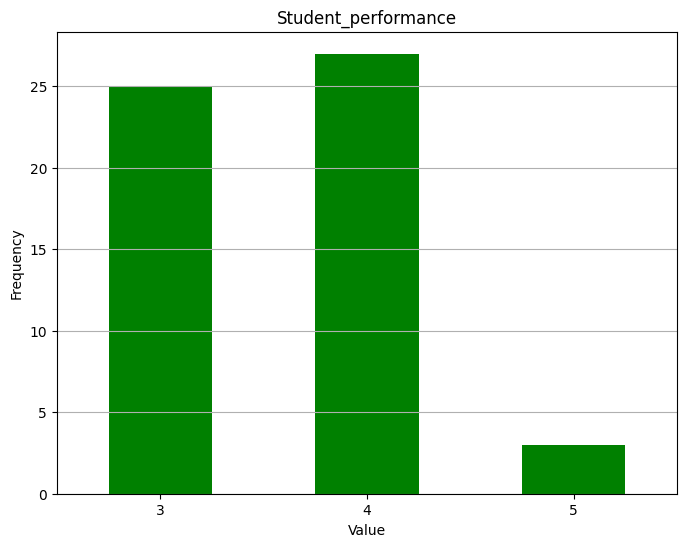

In [9]:
# Calculate the frequency of the column
frequency_values = df['¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora? '].value_counts()
frequency_values = frequency_values.sort_index()

# Define the bar chart
plt.figure(figsize=(8, 6))
frequency_values.plot(kind='bar', color='green')
plt.title('Student_performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

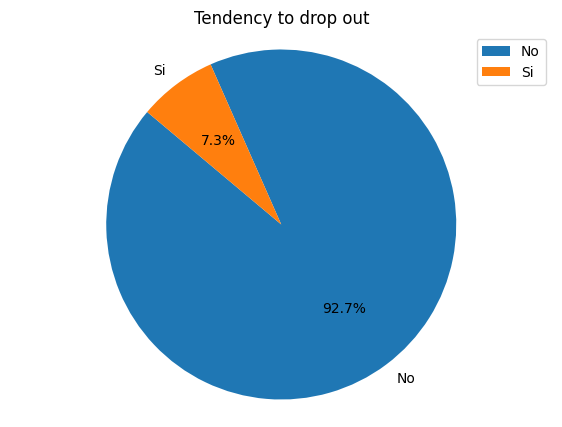

In [10]:
# Count ocurrency of each element
gender_count = df['¿Has desertado de la universidad?'].value_counts()

# Create the graphic and its features
plt.figure(figsize=(7,5 ))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Tendency to drop out')
plt.axis('equal')
plt.legend(gender_count.index, loc='upper right')
plt.show()

### Data preparation

In [11]:
# Drop innecesary columns
df = df.drop('Marca temporal',axis=1)
df.head()

,Género,¿Cómo calificarías tu rendimiento estudiantil en la UNMSM hasta ahora?,¿Cómo calificarías tu nivel socioeconómico?,¿Cómo calificarías tu nivel de salud psicológica?,¿Qué tan frecuente es tu participación en programas de apoyo estudiantil (tutorías o programas de orientación académica)?,¿Qué tan frecuente tiene compromisos externos a la universidad?,¿Recibes apoyo y comprensión de tu familia en relación con tus estudios universitarios?,"¿Se siente estresado por la sobrecarga académica (tareas, practicas, etc.) ?",¿Tienes dificultades para aprender lo que te enseñan en la universidad?,¿Crees que las calificaciones son justas?,¿En el ultimo semestre has jalado más de 2 cursos?,¿Crees que tu ingreso familiar es el adecuado para solventar los gastos?,¿Crees que vives lejos de la universidad?,¿Has desertado de la universidad?
0,Masculino,4,3,4,2,3,4,Si,No,Si,No,Si,Si,No
1,Masculino,4,3,4,2,3,5,Si,Si,Si,No,Si,No,No
2,Masculino,4,2,3,3,3,4,Si,No,No,No,No,No,No
3,Femenino,4,3,3,3,2,3,Si,Si,No,No,No,No,No
4,Masculino,3,3,4,2,3,4,Si,No,No,No,Si,Si,No


In [12]:
# Rename column headers
new_columns_name = [
    'Gender',
    'Student_performance',
    'Socioeconomic_level',
    'Psycological_health_level',
    'Participation_frequency_in_tutorials',
    'External_commitments_frequency',
    'Family_support',
    'Stress_level',
    'Learning_difficulties',
    'Calification_opinion',
    'Course_disapproval_level',
    'Family_income',
    'Distance_from_university',
    'College_dropout_variable'
]

df.columns = new_columns_name
df.head()

,Gender,Student_performance,Socioeconomic_level,Psycological_health_level,Participation_frequency_in_tutorials,External_commitments_frequency,Family_support,Stress_level,Learning_difficulties,Calification_opinion,Course_disapproval_level,Family_income,Distance_from_university,College_dropout_variable
0,Masculino,4,3,4,2,3,4,Si,No,Si,No,Si,Si,No
1,Masculino,4,3,4,2,3,5,Si,Si,Si,No,Si,No,No
2,Masculino,4,2,3,3,3,4,Si,No,No,No,No,No,No
3,Femenino,4,3,3,3,2,3,Si,Si,No,No,No,No,No
4,Masculino,3,3,4,2,3,4,Si,No,No,No,Si,Si,No


In [13]:
# Define replace mapping
replace_mapping = {'Si': 1, 'No': 0}

# Define columns to transform
columns_to_transform = ['Stress_level','Learning_difficulties','Calification_opinion','Course_disapproval_level','Family_income','Distance_from_university','College_dropout_variable']

# apply replacement to each column
for column in columns_to_transform:
  df[column] = df[column].replace(replace_mapping)

df.head()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_9828\2216127343.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replace_mapping)


,Gender,Student_performance,Socioeconomic_level,Psycological_health_level,Participation_frequency_in_tutorials,External_commitments_frequency,Family_support,Stress_level,Learning_difficulties,Calification_opinion,Course_disapproval_level,Family_income,Distance_from_university,College_dropout_variable
0,Masculino,4,3,4,2,3,4,1,0,1,0,1,1,0
1,Masculino,4,3,4,2,3,5,1,1,1,0,1,0,0
2,Masculino,4,2,3,3,3,4,1,0,0,0,0,0,0
3,Femenino,4,3,3,3,2,3,1,1,0,0,0,0,0
4,Masculino,3,3,4,2,3,4,1,0,0,0,1,1,0


In [14]:
# Define replace for gender
replace_mapping = {'Masculino': 1, 'Femenino': 0}

df['Gender'] = df['Gender'].replace(replace_mapping)

df.head()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_9828\2543562189.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(replace_mapping)


,Gender,Student_performance,Socioeconomic_level,Psycological_health_level,Participation_frequency_in_tutorials,External_commitments_frequency,Family_support,Stress_level,Learning_difficulties,Calification_opinion,Course_disapproval_level,Family_income,Distance_from_university,College_dropout_variable
0,1,4,3,4,2,3,4,1,0,1,0,1,1,0
1,1,4,3,4,2,3,5,1,1,1,0,1,0,0
2,1,4,2,3,3,3,4,1,0,0,0,0,0,0
3,0,4,3,3,3,2,3,1,1,0,0,0,0,0
4,1,3,3,4,2,3,4,1,0,0,0,1,1,0


### Generate the model

In [15]:
# Separate variables into features and response variables.
data = df
x = data.drop('College_dropout_variable', axis=1)
y = data['College_dropout_variable']

In [16]:
# Split data in training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# Define the logistic regression model
model = LogisticRegression()

In [18]:
# Train the model
history = model.fit(x_train_scaled, y_train)

In [19]:
# Make predictions with test set
y_pred = model.predict(x_test_scaled)

In [20]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


### Model analysis

In [21]:
# Obtain coefficients of the model
coefficients = model.coef_[0]

# Print coefficients of each feature
print("Coefficients of each feature:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef}")

Coefficients of each feature:
Feature 1: 0.2403027424805832
Feature 2: 0.4631852415125589
Feature 3: -0.04939915460042265
Feature 4: 0.5411161219477059
Feature 5: 0.33672429158250833
Feature 6: 0.8565257596405115
Feature 7: -0.9951000591545563
Feature 8: -0.7107505713912486
Feature 9: -0.3896024842621802
Feature 10: 0.0651025158491775
Feature 11: 0.0
Feature 12: 0.22876454376714955
Feature 13: -0.6336374735812705


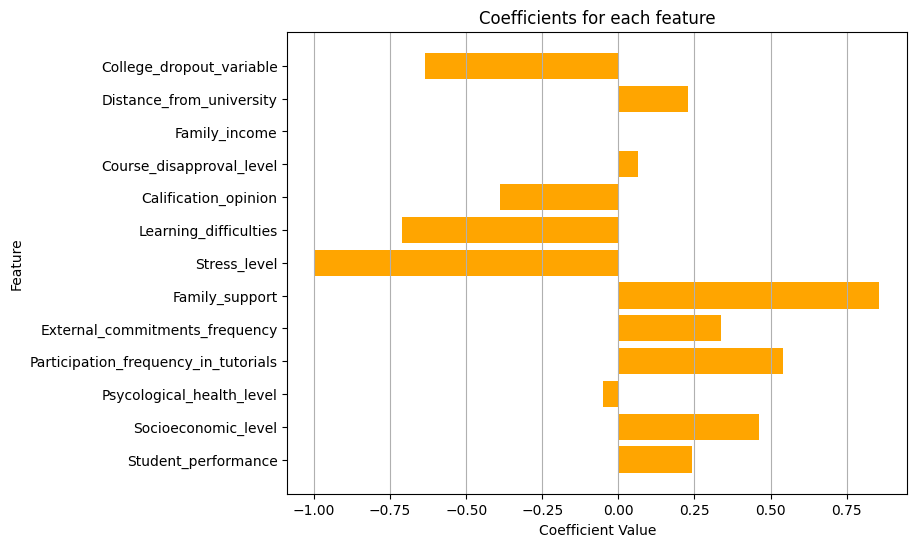

In [24]:
# Define the plot
plt.figure(figsize=(8, 6))
plt.barh(df.columns[1:], coefficients, color='orange')  # Excluimos la primera columna ('Marca temporal')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients for each feature')
plt.yticks(range(len(df.columns[1:])), df.columns[1:])  # Establecemos los ticks con los nombres de las columnas
plt.grid(axis='x')
plt.show()

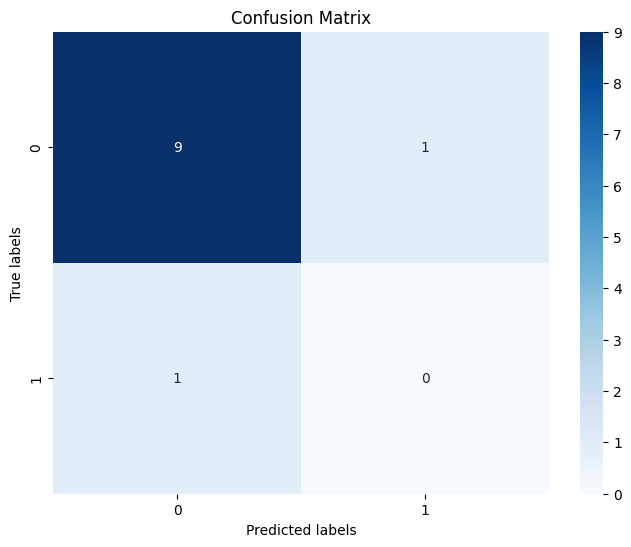

In [25]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()